<a href="https://colab.research.google.com/github/susritagagireddy/AIML-projects-and-labs/blob/main/STP_Module_3_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization

---

## Binary Classification Task: Diabetes Dataset

We'll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

**Dataset Source:** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

Upload the diabetes.csv file that has been provided to you.

In [2]:
# Upload the diabetes data CSV file
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

## Dataset Overview

In [4]:
# Display the first few rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
# Check dataset dimensions
print(f"Dataset shape: {diabetes_data.shape}")
print(f"Number of samples: {diabetes_data.shape[0]}")
print(f"Number of features: {diabetes_data.shape[1]}")

Dataset shape: (768, 9)
Number of samples: 768
Number of features: 9


In [6]:
# Dataset information
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
# Check for missing values
print("Missing values per column:")
print(diabetes_data.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Statistical Summary

In [8]:
# Descriptive statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Check the target variable distribution
print("Outcome distribution:")
print(diabetes_data['Outcome'].value_counts())
print(f"\nPercentage of diabetic cases: {diabetes_data['Outcome'].mean()*100:.2f}%")

Outcome distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of diabetic cases: 34.90%


## Data Visualization

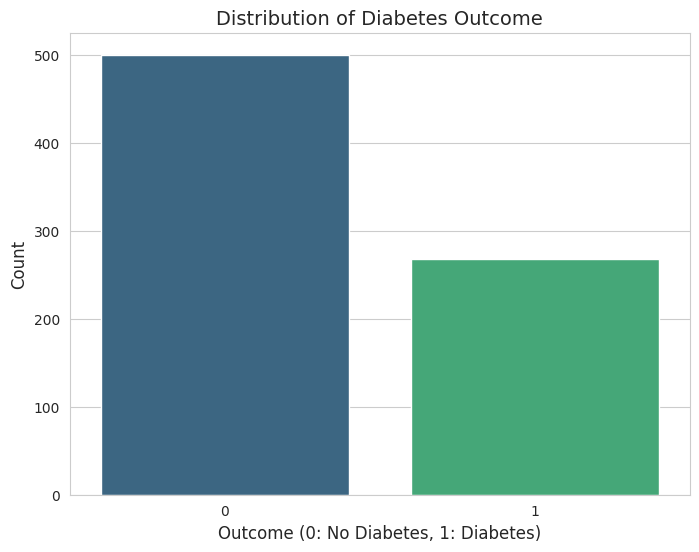

In [10]:
# Visualize the target variable distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes_data, palette='viridis')
plt.title('Distribution of Diabetes Outcome', fontsize=14)
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

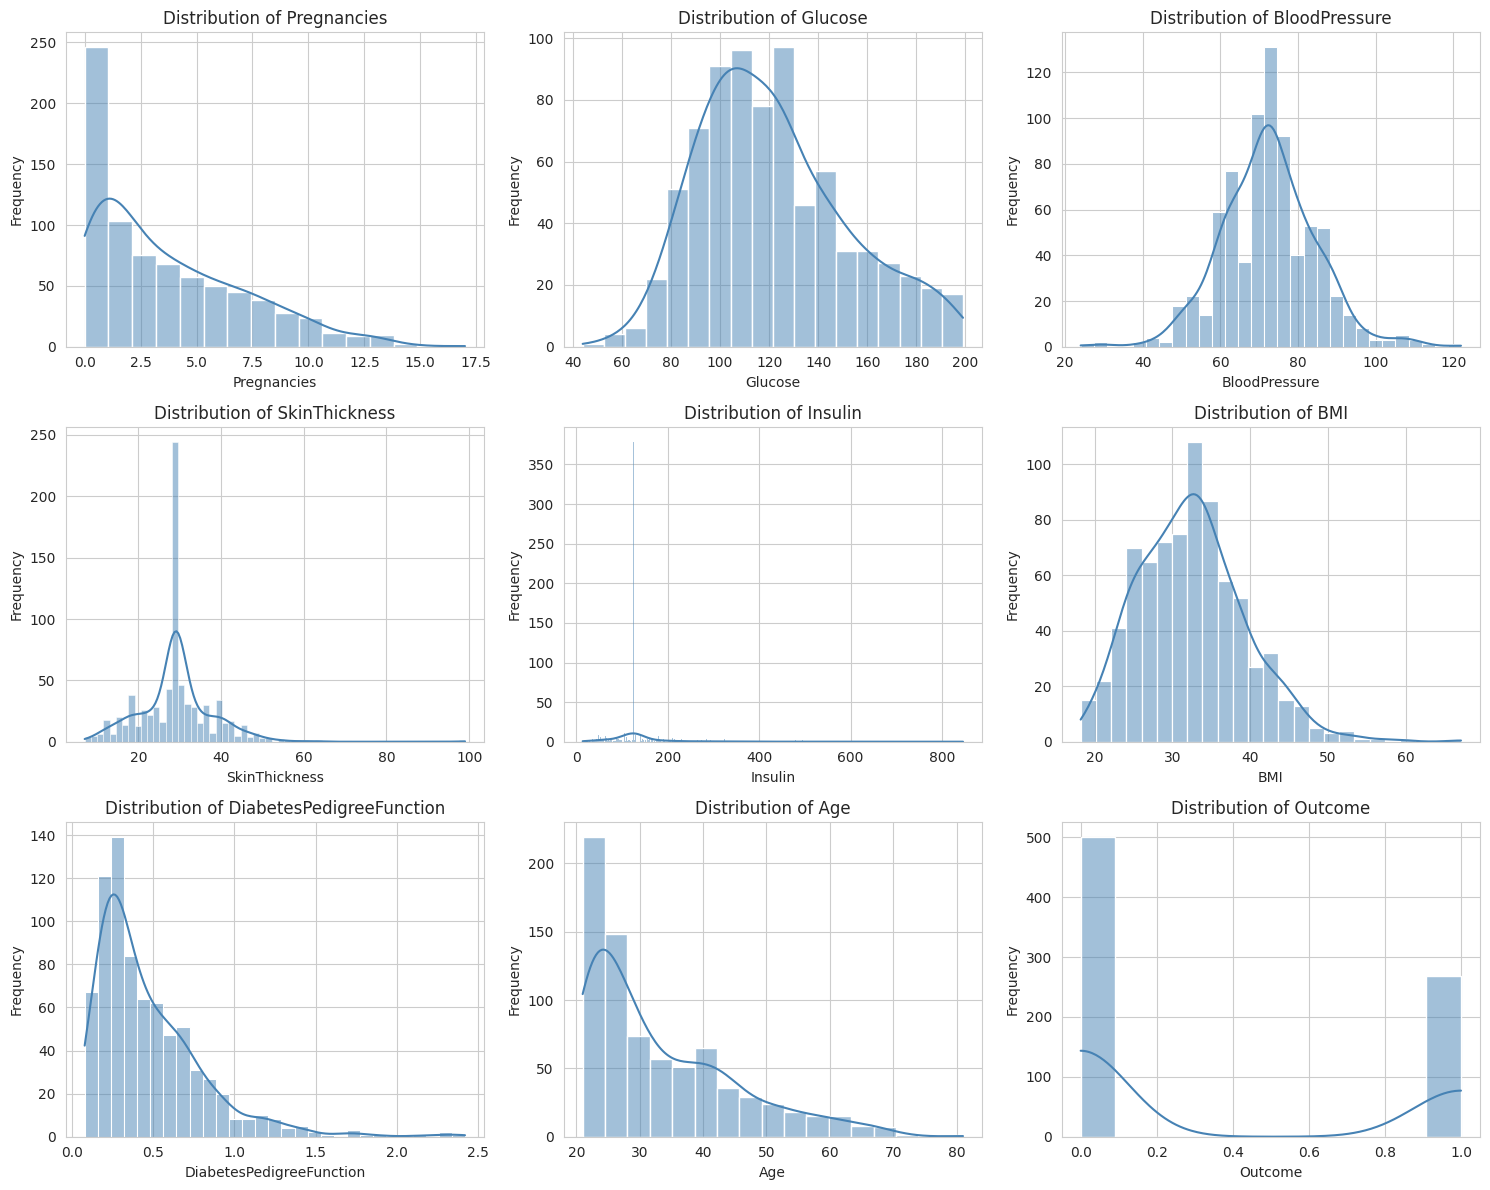

In [11]:
# Distribution of all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(diabetes_data.columns):
    sns.histplot(diabetes_data[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

## TASK-1: Correlation Analysis

Compute the correlation matrix and visualize it using a heatmap to understand the relationships between different features.

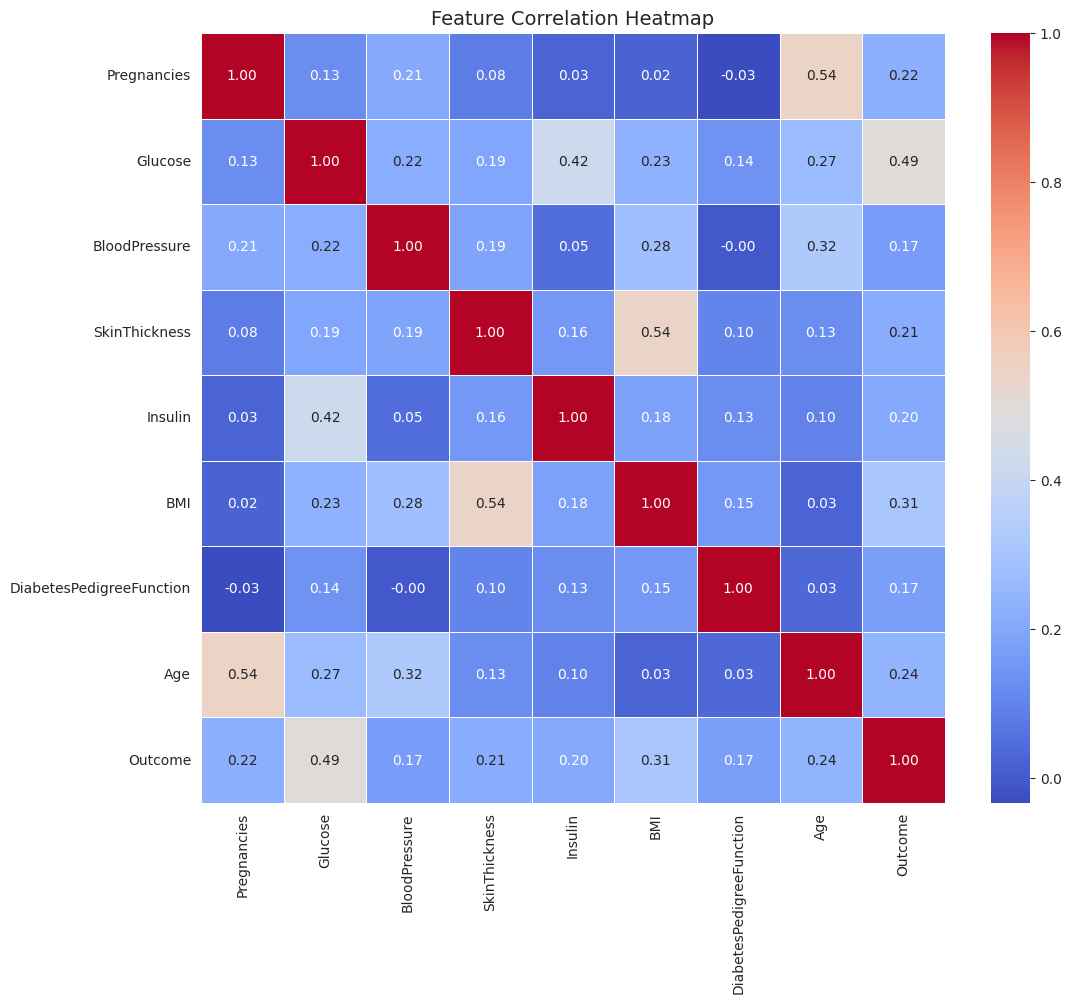

In [12]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Visualize with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

## TASK-2: Comparative Box Plots

Create box plots to compare the distribution of each feature for diabetic vs non-diabetic patients.

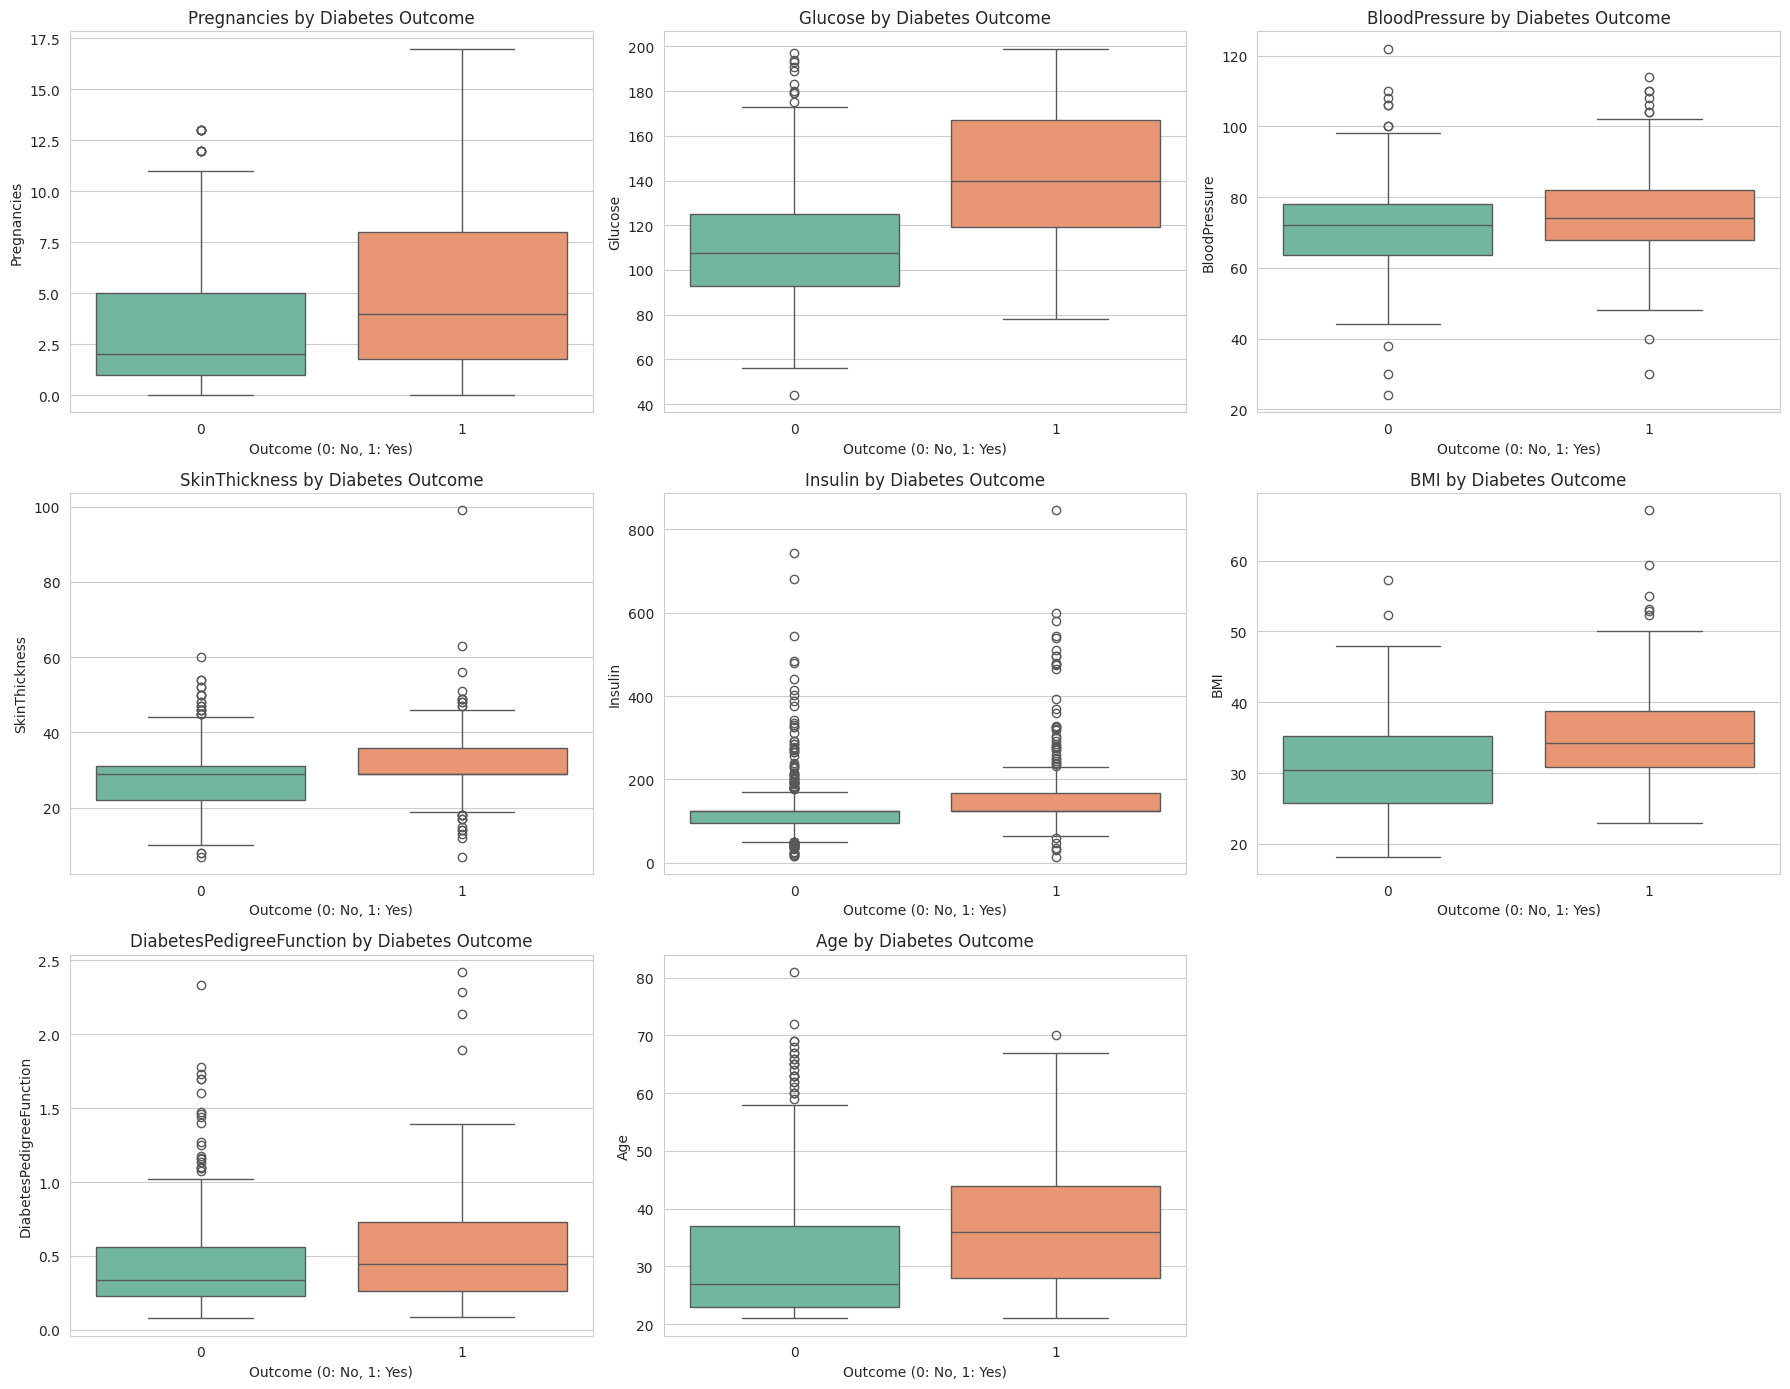

In [13]:
# Box plots for all features grouped by Outcome
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

feature_cols = diabetes_data.columns[:-1]  # All columns except Outcome

for i, col in enumerate(feature_cols):
    sns.boxplot(x='Outcome', y=col, data=diabetes_data, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Diabetes Outcome', fontsize=12)
    axes[i].set_xlabel('Outcome (0: No, 1: Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

# Hide the last subplot if not needed
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## TASK-3: Pairplot Analysis

Create a pairplot to visualize the pairwise relationships between features, colored by the Outcome variable.

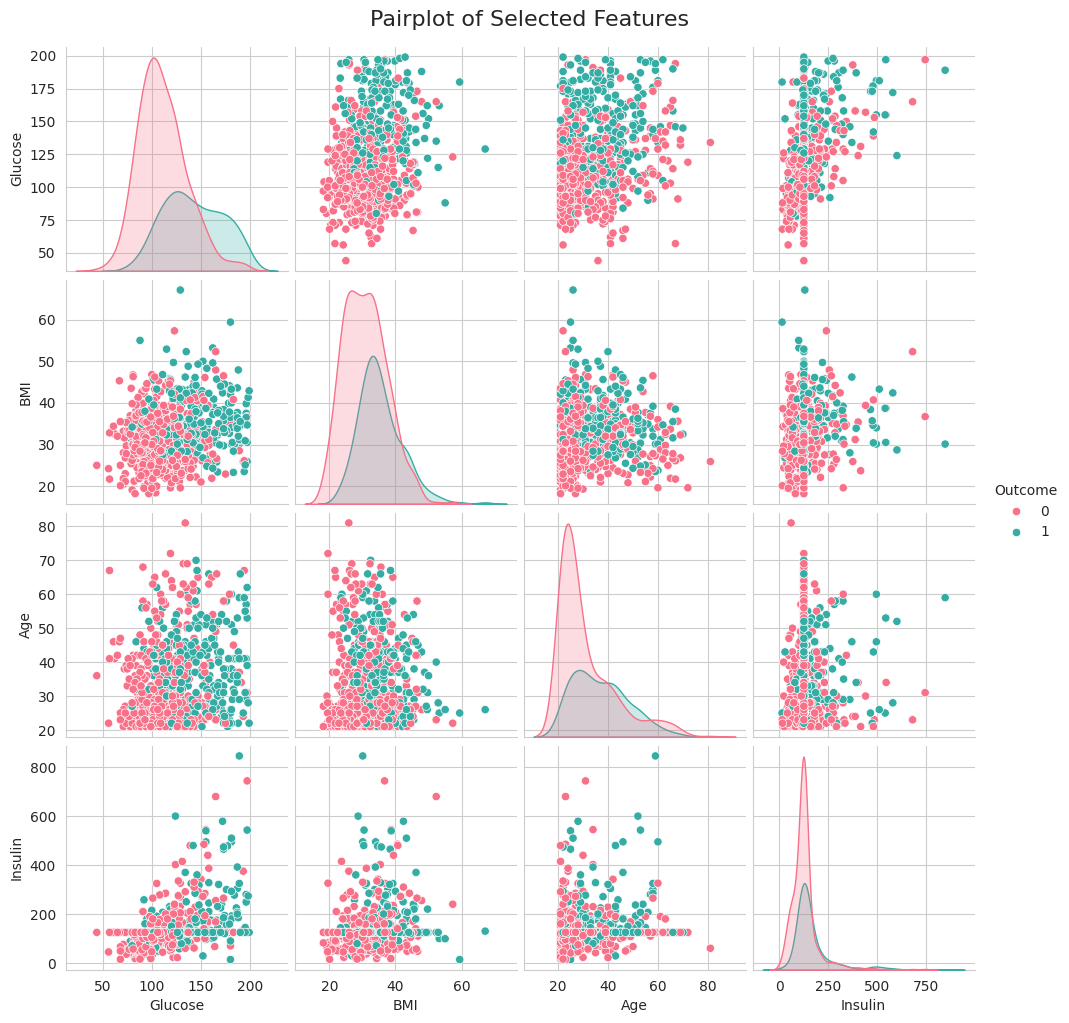

In [14]:
# Select a subset of features for clearer visualization
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(diabetes_data[selected_features], hue='Outcome', palette='husl', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()

## K-Nearest Neighbors (KNN) Classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## TASK-4: Train-Test Split

Split the dataset into training (70%) and testing (30%) sets.

In [16]:
# Prepare features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 537
Testing set size: 231


## TASK-5: Build and Evaluate KNN Model

Train a KNN classifier with k=1 and evaluate its performance.

In [17]:
# Train KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")

Confusion Matrix:
[[116  34]
 [ 42  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       150
           1       0.53      0.48      0.51        81

    accuracy                           0.67       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.66      0.67      0.67       231


Accuracy Score: 67.10%


## TASK-6: Finding the Optimal K Value

Test different values of K (from 1 to 40) and plot the error rate to find the optimal K value.

In [18]:
# Store the original unscaled data for later comparison
unchanged_data = X.copy()

# Function to evaluate KNN performance across different K values
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot error rate
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value', fontsize=14)
    plt.xlabel('K', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find best K values
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print(f'Max train score: {max_train_score*100:.2f}% at K = {[x+1 for x in train_scores_ind]}')

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print(f'Max test score: {max_test_score*100:.2f}% at K = {[x+1 for x in test_scores_ind]}')

    return test_scores

Performance on Unscaled Data:


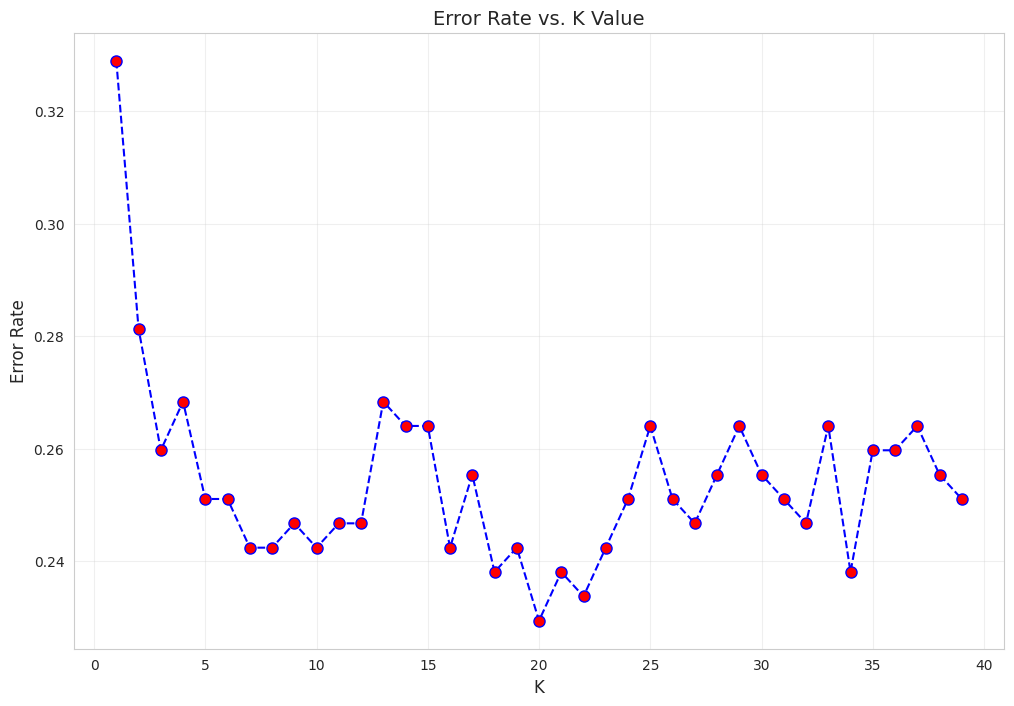

Max train score: 100.00% at K = [1]
Max test score: 77.06% at K = [20]


In [19]:
# Evaluate on unscaled data
print("Performance on Unscaled Data:")
unchanged_test_scores = plot_KNN_error_rate(unchanged_data, diabetes_data['Outcome'])

## Standardize the Variables

Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$

Where:
- Z is the standardized value
- X is the original value
- μ is the mean of the feature
- σ is the standard deviation of the feature

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data features
scaler.fit(diabetes_data.drop('Outcome', axis=1))

# Transform the features
scaled_data = scaler.transform(diabetes_data.drop('Outcome', axis=1))

In [21]:
# Create a dataframe with scaled features
df_feat = pd.DataFrame(scaled_data, columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [22]:
# Verify standardization: mean should be ~0, std should be ~1
print("Mean of scaled features:")
print(df_feat.mean())
print("\nStandard deviation of scaled features:")
print(df_feat.std())

Mean of scaled features:
Pregnancies                -6.476301e-17
Glucose                    -3.561966e-16
BloodPressure              -4.325244e-16
SkinThickness              -1.526557e-16
Insulin                     1.503427e-17
BMI                         2.613650e-16
DiabetesPedigreeFunction    2.174187e-16
Age                         1.931325e-16
dtype: float64

Standard deviation of scaled features:
Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
dtype: float64


Performance on Standardized Data:


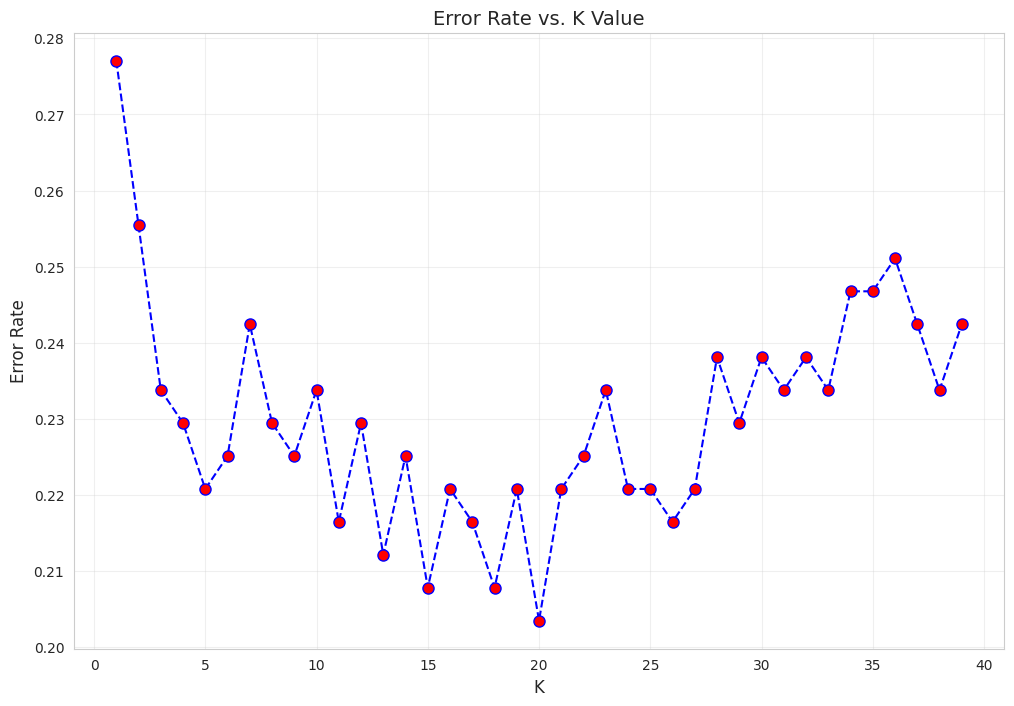

Max train score: 100.00% at K = [1]
Max test score: 79.65% at K = [20]


In [23]:
# Evaluate on scaled data
print("Performance on Standardized Data:")
scaled_test_scores = plot_KNN_error_rate(scaled_data, diabetes_data['Outcome'])

## Comparing Accuracy Before and After Standardization

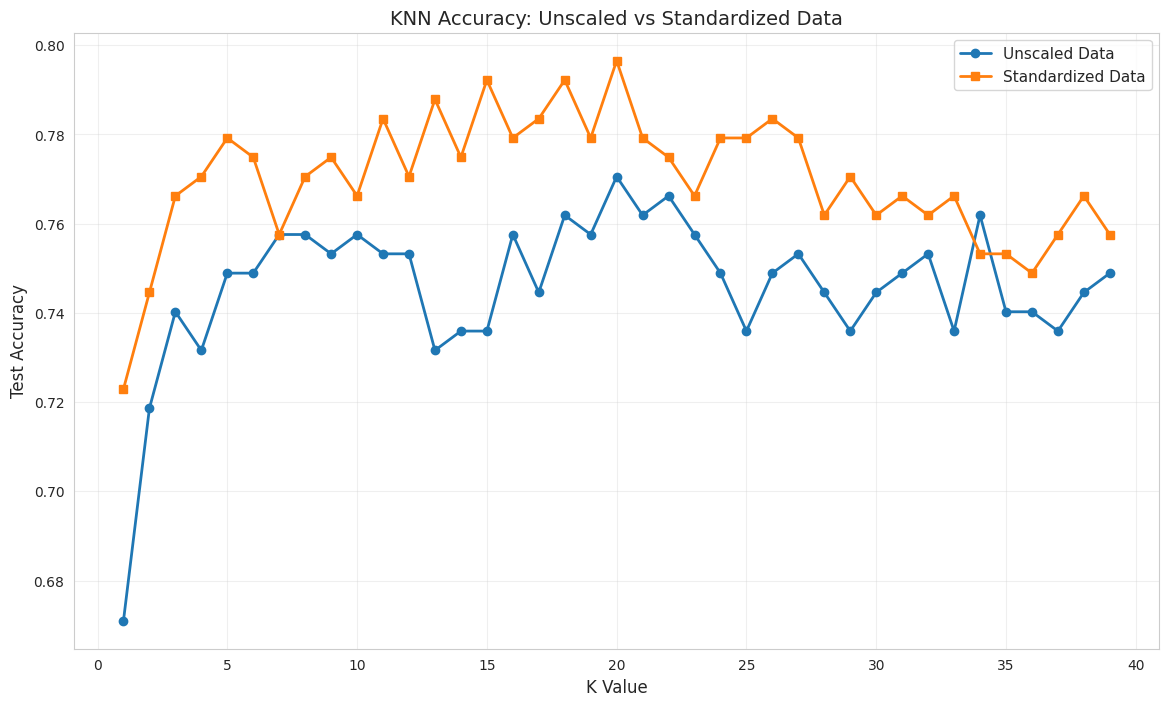

In [24]:
# Compare performance
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), unchanged_test_scores, marker='o', label='Unscaled Data', linewidth=2)
plt.plot(range(1, 40), scaled_test_scores, marker='s', label='Standardized Data', linewidth=2)
plt.title('KNN Accuracy: Unscaled vs Standardized Data', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, glucose levels, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems. This improvement occurs because:

1. KNN is distance-based and features with larger scales dominate the distance calculation
2. Standardization puts all features on equal footing
3. This leads to more balanced and accurate predictions

---
# DIY Challenges

Test your understanding by completing these three challenges. Solutions are not provided - work through them independently!

## Challenge 1: MinMax Scaling Comparison

**Objective:** Implement MinMax scaling and compare its performance with StandardScaler.

**Tasks:**
1. Import `MinMaxScaler` from sklearn.preprocessing
2. Apply MinMax scaling to the dataset (scales features to range [0, 1])
3. Use the `plot_KNN_error_rate()` function on the MinMax-scaled data
4. Create a comparison plot showing all three approaches: unscaled, standardized, and MinMax-scaled
5. Analyze which scaling method performs best and why

**Hint:** MinMaxScaler formula is: $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$

Performance on MinMax Scaled Data:


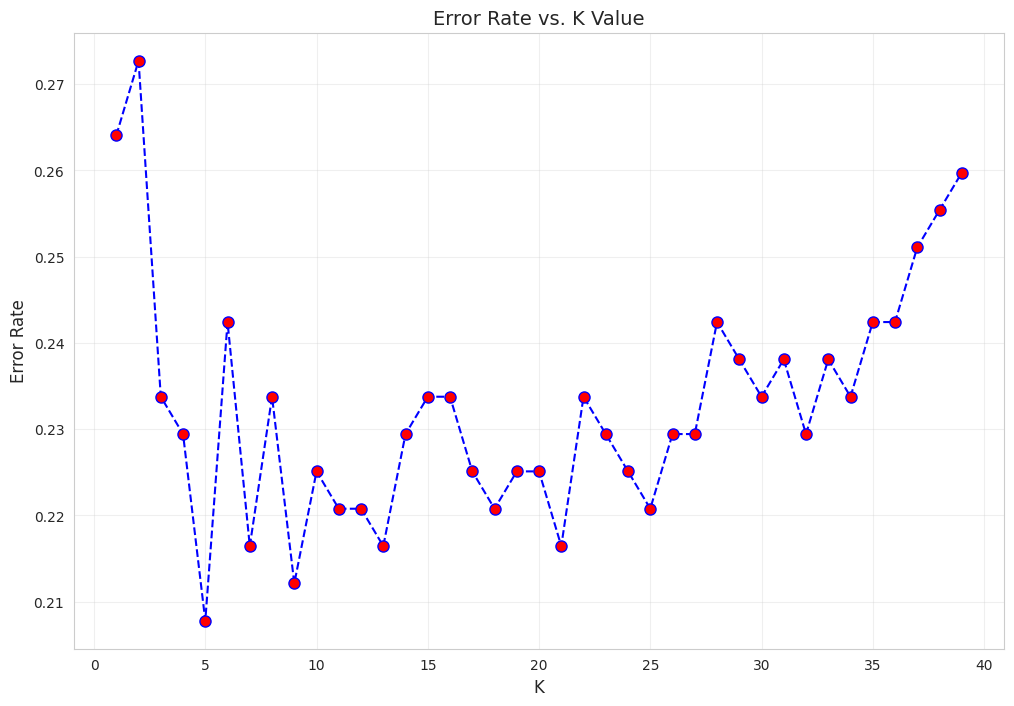

Max train score: 100.00% at K = [1]
Max test score: 79.22% at K = [5]


In [34]:
# Your code here for Challenge 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(diabetes_data.drop('Outcome', axis=1))

scaled_mm_data = scaler.transform(diabetes_data.drop('Outcome', axis=1))

print("Performance on MinMax Scaled Data:")
scaled_mm_test_scores = plot_KNN_error_rate(scaled_mm_data, diabetes_data['Outcome'])


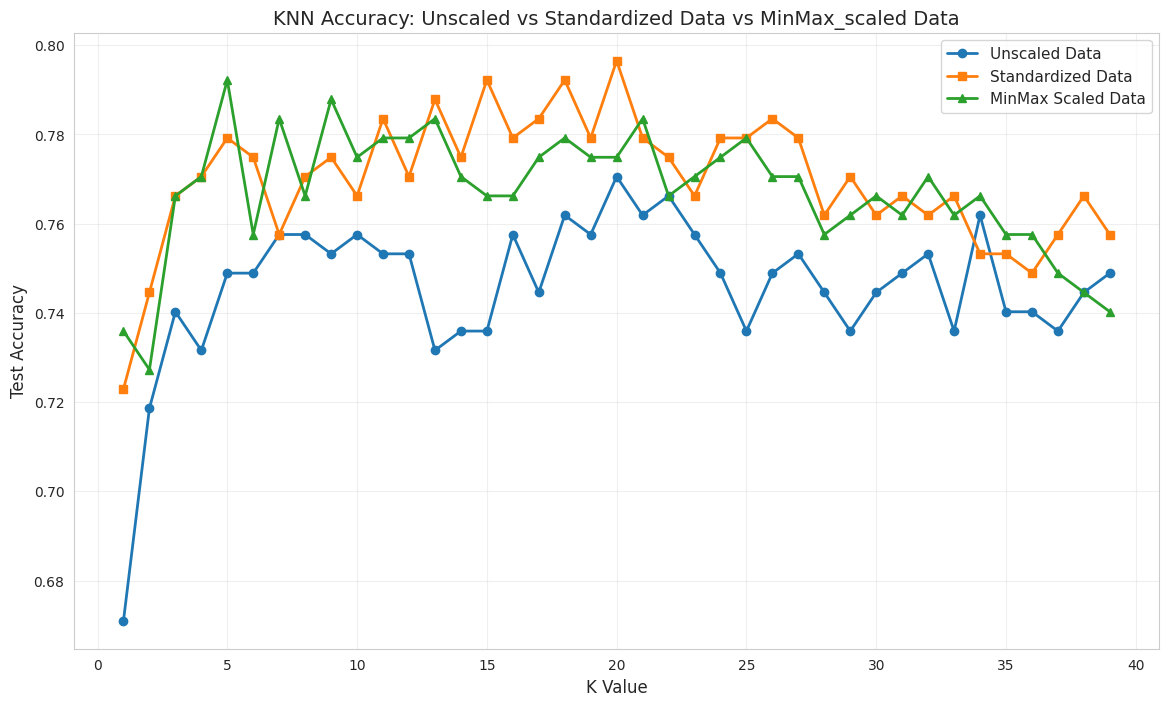

In [35]:
#comparision plot of unscaled vs standardized vs MinMax-scaled
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), unchanged_test_scores, marker='o', label='Unscaled Data', linewidth=2)
plt.plot(range(1, 40), scaled_test_scores, marker='s', label='Standardized Data', linewidth=2)
plt.plot(range(1, 40), scaled_mm_test_scores, marker='^', label='MinMax Scaled Data', linewidth=2)
plt.title('KNN Accuracy: Unscaled vs Standardized Data vs MinMax_scaled Data', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

- Unscaled Data performs the worst as we can see from above graph it overfits for k=1 and fluctuates more.
- Standardized Data performed well incomparision to remaining ones,Curve is stable and remains higher than both other methods across most K values.The zero mean and unit variance is best approch for distance-based algorithms as all attributes contribute equally to distance computation.
- MinMax Scaled Data performs better than the unscaled data but does not outperform the standardized data, placing it between the two. Although it scales all features to the range [0,1], it is sensitive to outliers, which can compress the majority of values and reduce the effectiveness of distance calculations in KNN

## Challenge 2: K-Fold Cross-Validation Analysis

**Objective:** Implement K-Fold cross-validation to get more robust performance estimates.

**Tasks:**
1. Import `cross_val_score` from sklearn.model_selection
2. Implement 5-fold cross-validation for KNN with K values from 1 to 40
3. Compare cross-validation scores for:
   - Unscaled data
   - Standardized data
   - MinMax-scaled data (from Challenge 1)
4. Plot the mean cross-validation accuracy with standard deviation error bars
5. Determine the optimal K value for each scaling approach

**Bonus:** Calculate and display the standard deviation of cross-validation scores to understand model stability.

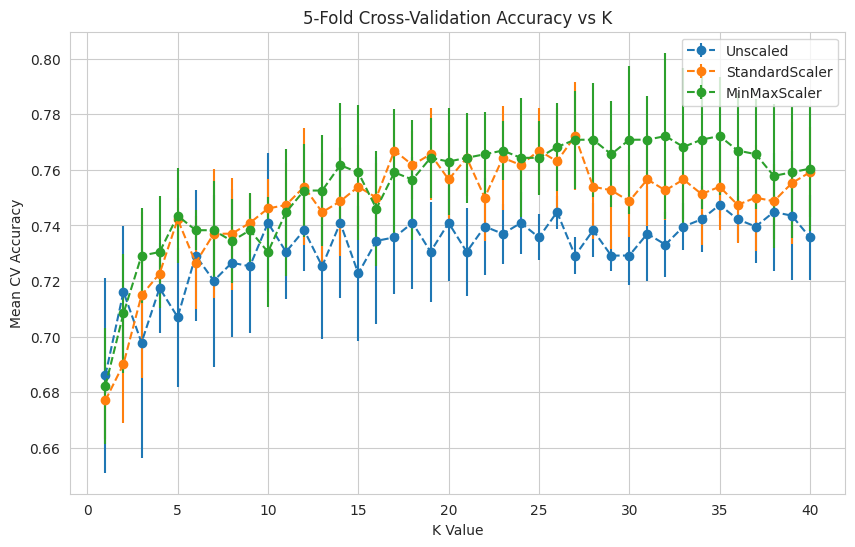

Optimal K values:
Unscaled → K = 35 0.7473983532807063
StandardScaler → K = 27 0.7721585603938544
MinMaxScaler → K = 35 0.7721500721500721


In [49]:
# Your code here for Challenge 2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

x=diabetes_data.drop('Outcome', axis=1)
y=diabetes_data['Outcome']

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_range = range(1, 41)

unscaled_mean, unscaled_std = [], []
std_mean, std_std = [], []
mm_mean, mm_std = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X, y, cv=kf)
    unscaled_mean.append(scores.mean())
    unscaled_std.append(scores.std())

    scores = cross_val_score(knn, X_std, y, cv=kf)
    std_mean.append(scores.mean())
    std_std.append(scores.std())

    scores = cross_val_score(knn, X_mm, y, cv=kf)
    mm_mean.append(scores.mean())
    mm_std.append(scores.std())

plt.figure(figsize=(10,6))

plt.errorbar(k_range, unscaled_mean, yerr=unscaled_std, label='Unscaled', fmt='o--')
plt.errorbar(k_range, std_mean, yerr=std_std, label='StandardScaler', fmt='o--')
plt.errorbar(k_range, mm_mean, yerr=mm_std, label='MinMaxScaler', fmt='o--')

plt.xlabel("K Value")
plt.ylabel("Mean CV Accuracy")
plt.title("5-Fold Cross-Validation Accuracy vs K")
plt.legend()
plt.show()

def find_best(scores):
    best_score = max(scores)
    best_k = scores.index(best_score) + 1
    return best_k, best_score

print("Optimal K values:")
print("Unscaled → K =", *find_best(unscaled_mean))
print("StandardScaler → K =", *find_best(std_mean))
print("MinMaxScaler → K =", *find_best(mm_mean))


- When we compare the accuracies we can observe that unscaled data has the least accuracy.
- Both standard scaler and min max scaler has almost similar accuracy but standard scaler being slightly higher
- Even though they are similar from the graph we can observe that minmaxscaler is less stable high variance
-so the best overall reliable performer is The Standard scaler.It has large errorbars

## Challenge 3: Feature Selection and Performance Analysis

**Objective:** Investigate how feature selection impacts KNN performance.

**Tasks:**
1. Based on the correlation analysis from TASK-1, identify the top 4 features most correlated with 'Outcome'
2. Create a reduced dataset with only these 4 features
3. Apply standardization to this reduced feature set
4. Train KNN models (K from 1 to 40) on both:
   - Full feature set (standardized)
   - Reduced feature set (standardized)
5. Create a comparison plot showing:
   - Accuracy vs K for full features
   - Accuracy vs K for reduced features
6. Analyze:
   - Does reducing features improve or hurt performance?
   - What is the optimal K for each feature set?
   - What insights can you draw about feature importance?

**Bonus:** Try different numbers of features (3, 5, 6) and see how it affects performance.

Top 4 correlated features: ['Glucose', 'BMI', 'Age', 'Pregnancies']


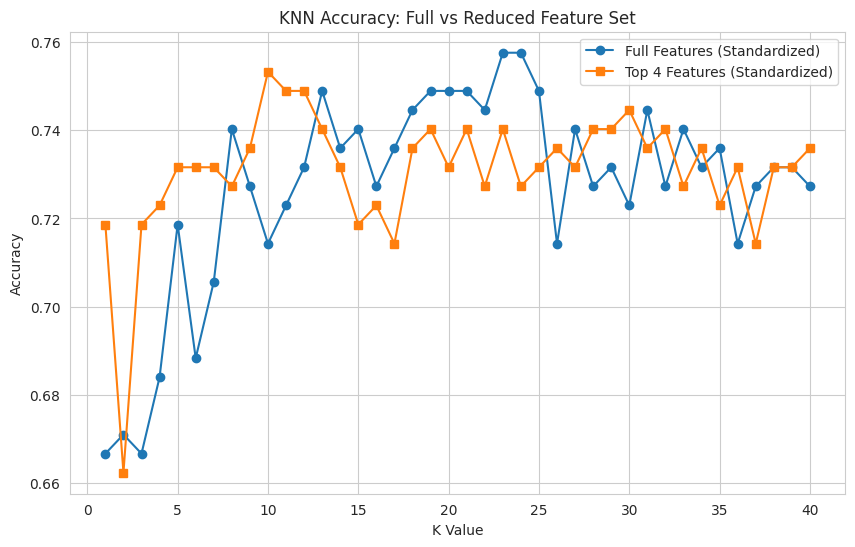

Optimal K values:
Full Features → K = 23
Top 4 Features → K = 10


In [50]:
# Your code here for Challenge 3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

corr = diabetes_data.corr()['Outcome'].abs().sort_values(ascending=False)
top4_features = corr.index[1:5].tolist()
print("Top 4 correlated features:", top4_features)

y = diabetes_data['Outcome']

X_full = unchanged_data
X_reduced = unchanged_data[top4_features]

std_scaler = StandardScaler()
X_full_std = std_scaler.fit_transform(X_full)
X_reduced_std = std_scaler.fit_transform(X_reduced)



Xf_train, Xf_test, y_train, y_test = train_test_split(
    X_full_std, y, test_size=0.3, random_state=42)

Xr_train, Xr_test, y_train, y_test = train_test_split(
    X_reduced_std, y, test_size=0.3, random_state=42)

full_scores, reduced_scores = [], []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(Xf_train, y_train)
    full_scores.append(knn.score(Xf_test, y_test))

    knn.fit(Xr_train, y_train)
    reduced_scores.append(knn.score(Xr_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,41), full_scores, label='Full Features (Standardized)', marker='o')
plt.plot(range(1,41), reduced_scores, label='Top 4 Features (Standardized)', marker='s')

plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy: Full vs Reduced Feature Set")
plt.legend()
plt.show()

print("Optimal K values:")
print("Full Features → K =", np.argmax(full_scores) + 1)
print("Top 4 Features → K =", np.argmax(reduced_scores) + 1)



- As we can see from the graph top four features has slightly reduced accuracy than full features.
-  Removing features may reduce the noice but removing moderatly useful features too in this process may cause the difference in the accuracy.
- optimal k value for four features = 10
and for full features = 23
- The four features selected are important but cant be entirly depended upon as there are other features also that can be useful
- For KNN on diabetes data, standardized full feature set gives the most stable and accurate performance.


In [52]:
#Bonus
def evaluate_feature_count(n):
    top_n = corr.index[1:n+1].tolist()
    X_n = unchanged_data[top_n]
    X_n_std = StandardScaler().fit_transform(X_n)

    Xn_train, Xn_test, y_train, y_test = train_test_split(
        X_n_std, y, test_size=0.3, random_state=42)

    scores = []
    for k in range(1,41):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xn_train, y_train)
        scores.append(knn.score(Xn_test, y_test))

    print(f"{n} Features → Best K:", np.argmax(scores)+1,
          "Accuracy:", max(scores))

for n in [3, 5, 6]:
    evaluate_feature_count(n)


3 Features → Best K: 8 Accuracy: 0.7575757575757576
5 Features → Best K: 18 Accuracy: 0.7575757575757576
6 Features → Best K: 31 Accuracy: 0.7489177489177489


---
# References

1. [Pima Indians Diabetes Database - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
2. [Scikit-learn Documentation - KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. [Scikit-learn Documentation - StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
4. [Scikit-learn Documentation - MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)